# **GMSC Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

gmsc_ds_path = '../../datasets/GiveMeSomeCredit/cs-training.csv'
gmsc_prep_ds_path = '../../datasets/preprocessed/gmsc/'

(CVXPY) May 30 05:03:51 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 30 05:03:51 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(gmsc_prep_ds_path)

In [3]:
data = utilities.read_csv(gmsc_ds_path, dtype={'SeriousDlqin2yrs':'bool',
                                               'age':'int64',
                                               'NumberOfTime30-59DaysPastDueNotWorse':'int64',
                                               'NumberOfOpenCreditLinesAndLoans':'float64',
                                               'NumberOfTimes90DaysLate':'int64',
                                               'NumberRealEstateLoansOrLines':'float64',
                                               'NumberOfTime60-89DaysPastDueNotWorse':'int64',
                                               'NumberOfDependents':'float64'})
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,True,0.766127,45,2,0.802982,9120.0,13.0,0,6.0,0,2.0
1,2,False,0.957151,40,0,0.121876,2600.0,4.0,0,0.0,0,1.0
2,3,False,0.658180,38,1,0.085113,3042.0,2.0,1,0.0,0,0.0
3,4,False,0.233810,30,0,0.036050,3300.0,5.0,0,0.0,0,0.0
4,5,False,0.907239,49,1,0.024926,63588.0,7.0,0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,False,0.040674,74,0,0.225131,2100.0,4.0,0,1.0,0,0.0
149996,149997,False,0.299745,44,0,0.716562,5584.0,4.0,0,1.0,0,2.0
149997,149998,False,0.246044,58,0,3870.000000,NaN,18.0,0,1.0,0,0.0
149998,149999,False,0.000000,30,0,0.000000,5716.0,4.0,0,0.0,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  bool   
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

#### Plot features data types.

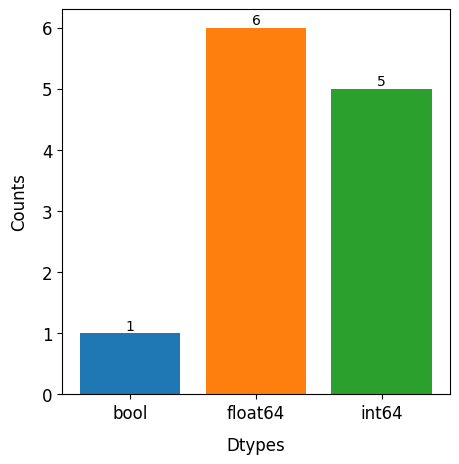

In [5]:
plotting.plot_dtypes_hist(data, save_path=gmsc_prep_ds_path)

#### Data cleaning.

In [6]:
before_data_cleaning_count = len(data)

#### Drop redundant ID column.

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

#### Rename features labels to have shorter names.

In [8]:
data.rename(columns={'SeriousDlqin2yrs':'defaulted',
                     'RevolvingUtilizationOfUnsecuredLines':'revol-util',
                     'NumberOfTime30-59DaysPastDueNotWorse':'30-59-past-due',
                     'DebtRatio':'debt-ratio',
                     'MonthlyIncome':'month-inc',
                     'NumberOfOpenCreditLinesAndLoans':'open-cll',
                     'NumberOfTimes90DaysLate':'90-late',
                     'NumberRealEstateLoansOrLines':'real-est-loans',
                     'NumberOfTime60-89DaysPastDueNotWorse':'60-89-past-due',
                     'NumberOfDependents':'depen'}, inplace=True)

#### Plot class distribution.

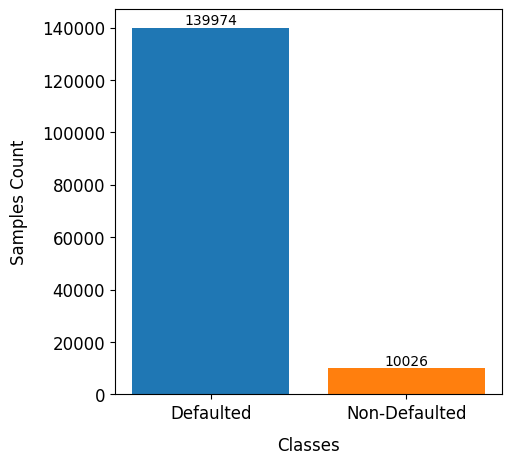

In [9]:
plotting.plot_class_distr_hist(data, save_path=gmsc_prep_ds_path)

#### Plot missing values histogram.

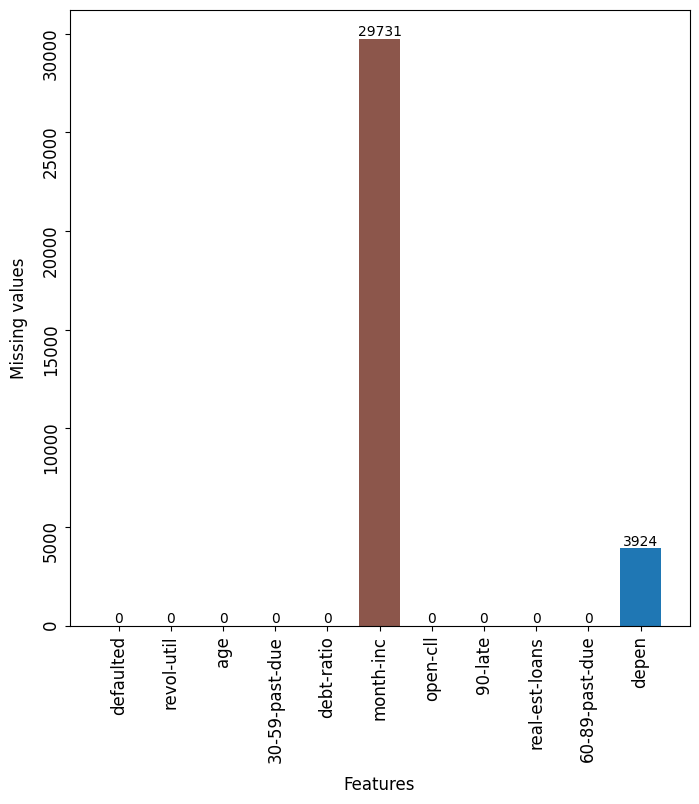

In [10]:
plotting.plot_missing_hist(data, figsize=(8,8), save_path=gmsc_prep_ds_path)

#### Fix features for which binning returns (-inf, inf).

In [11]:
data['30-59-past-due'] = data['30-59-past-due'].astype('category')
data['60-89-past-due'] = data['60-89-past-due'].astype('category')
data['90-late'] = data['90-late'].astype('category')

#### Apply optimal binninf and WoE.

In [12]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=gmsc_prep_ds_path,
                                                     verbose=True)



Processing feature: defaulted.


Processing feature: revol-util.
2023-05-30 17:03:52,150 | INFO : Optimal binning started.
2023-05-30 17:03:52,150 | INFO : Options: check parameters.
2023-05-30 17:03:52,150 | INFO : Pre-processing started.
2023-05-30 17:03:52,151 | INFO : Pre-processing: number of samples: 150000
2023-05-30 17:03:52,154 | INFO : Pre-processing: number of clean samples: 149237
2023-05-30 17:03:52,154 | INFO : Pre-processing: number of missing samples: 0
2023-05-30 17:03:52,155 | INFO : Pre-processing: number of special samples: 0
2023-05-30 17:03:52,155 | INFO : Pre-processing: number of outlier samples: 763
2023-05-30 17:03:52,155 | INFO : Pre-processing terminated. Time: 0.0034s
2023-05-30 17:03:52,155 | INFO : Pre-binning started.
2023-05-30 17:03:52,237 | INFO : Pre-binning: number of prebins: 14
2023-05-30 17:03:52,237 | INFO : Pre-binning: number of refinements: 0
2023-05-30 17:03:52,237 | INFO : Pre-binning terminated. Time: 0.0810s
2023-05-30 17:03:52,238 | IN

In [13]:
data

,defaulted,revol-util,age,30-59-past-due,debt-ratio,month-inc,open-cll,90-late,real-est-loans,60-89-past-due,depen
0,True,-0.909378,-0.210684,-1.901126,-0.646772,0.291338,0.126950,0.389739,-0.152424,0.288215,-0.250098
1,False,-1.396911,-0.326789,0.541721,0.136371,-0.431678,0.044997,0.389739,-0.245572,0.288215,-0.143369
2,False,-0.400244,-0.326789,-0.903654,0.136371,-0.431678,-0.729262,-2.299145,-0.245572,0.288215,0.099037
3,False,0.551316,-0.502833,0.541721,0.136371,-0.431678,0.056167,0.389739,-0.245572,0.288215,0.099037
4,False,-1.396911,-0.171597,-0.903654,0.136371,0.511699,0.189262,0.389739,0.247038,0.288215,0.099037
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,1.375509,1.040118,0.541721,0.183576,-0.384741,0.044997,0.389739,0.247038,0.288215,0.099037
149996,False,0.551316,-0.210684,0.541721,-0.388170,0.009908,0.044997,0.389739,0.247038,0.288215,-0.250098
149997,False,0.551316,0.253180,0.541721,-0.646772,0.000000,-0.047096,0.389739,0.247038,0.288215,0.099037
149998,False,1.375509,-0.502833,0.541721,0.136371,0.009908,0.044997,0.389739,-0.245572,0.288215,0.099037


#### All missing values handled.

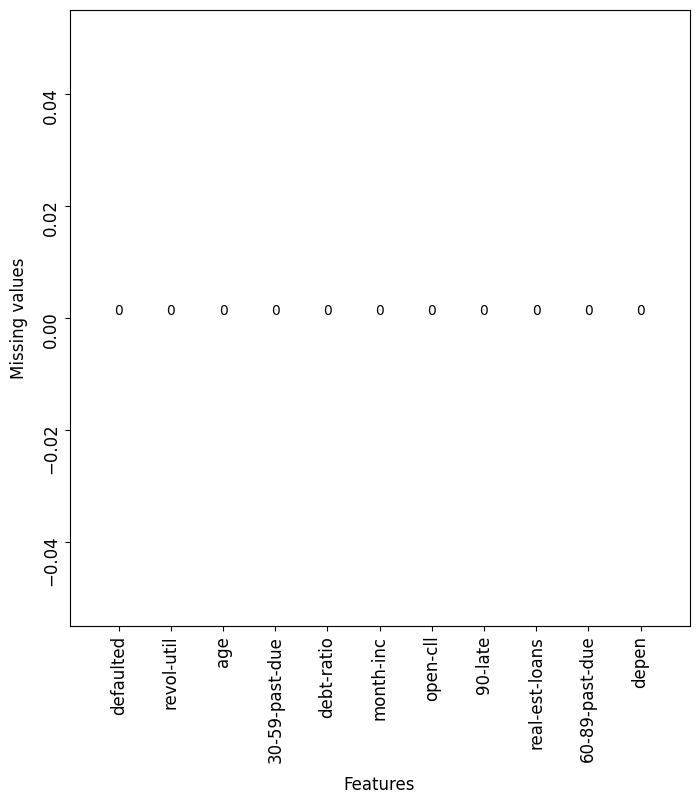

In [14]:
plotting.plot_missing_hist(data, figsize=(8,8), save_path=gmsc_prep_ds_path)

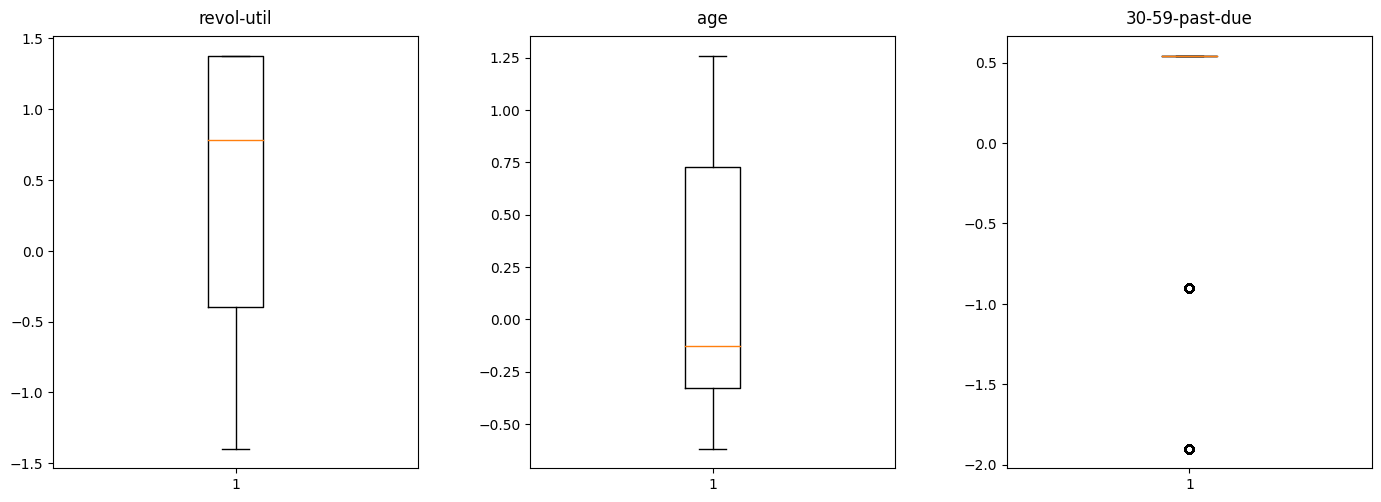

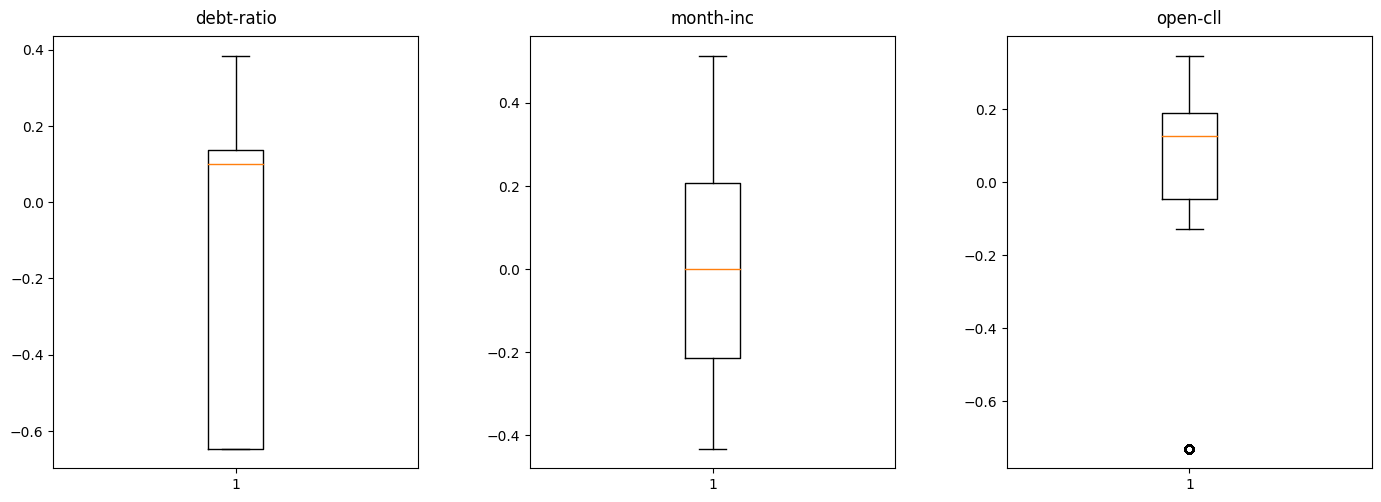

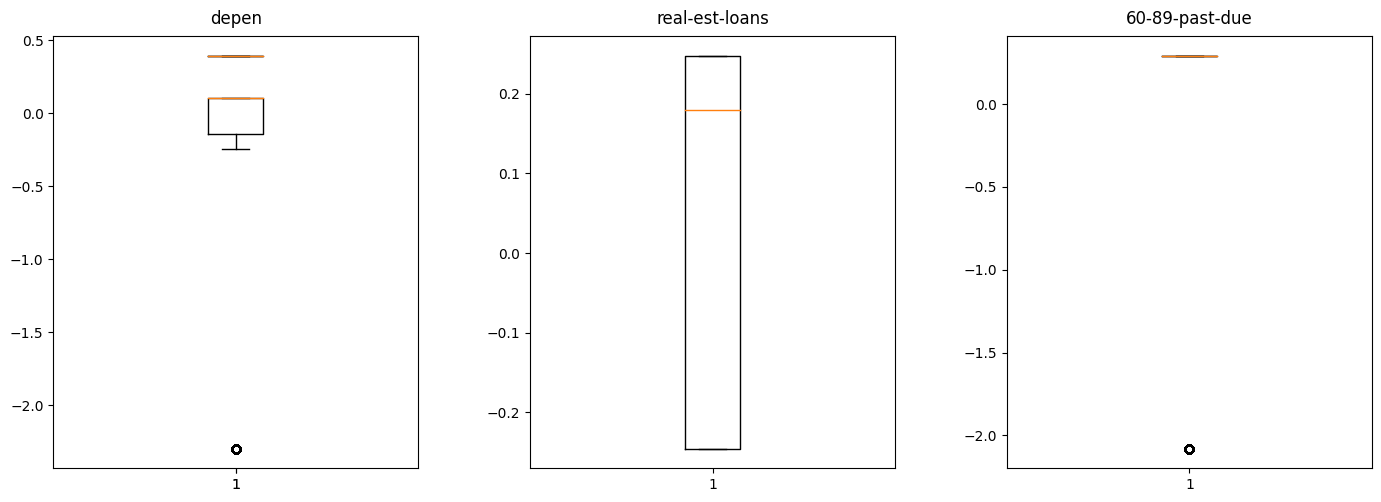

In [15]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=gmsc_prep_ds_path)

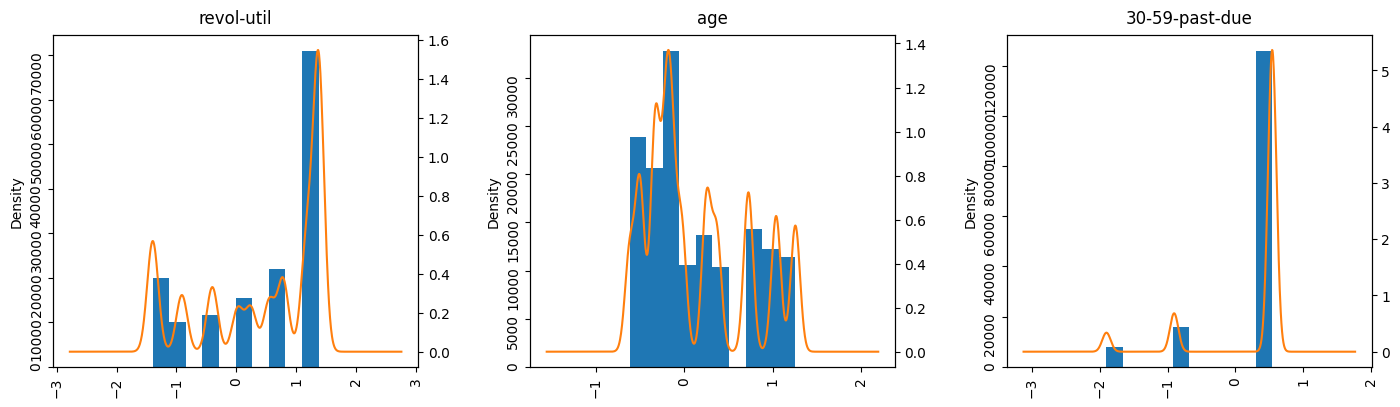

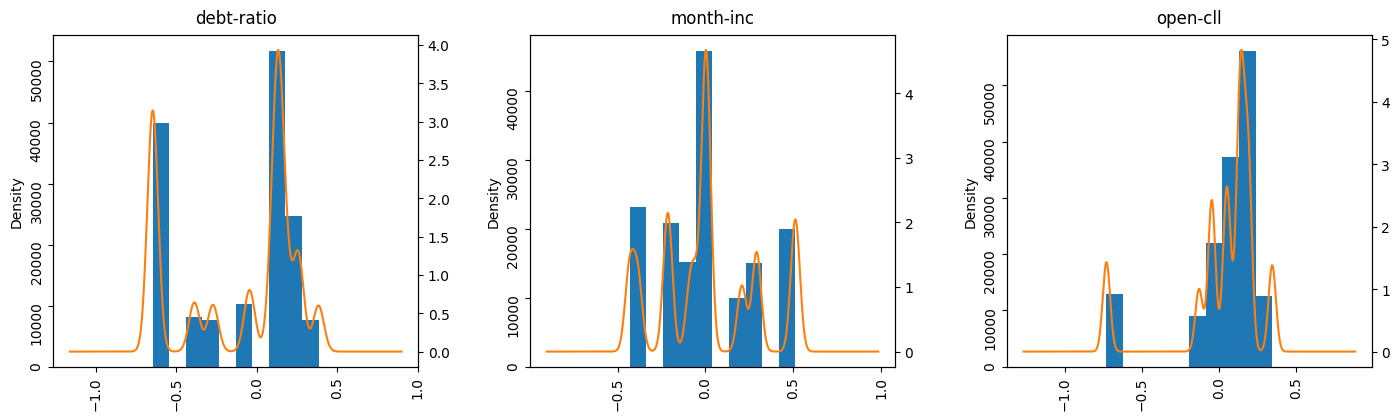

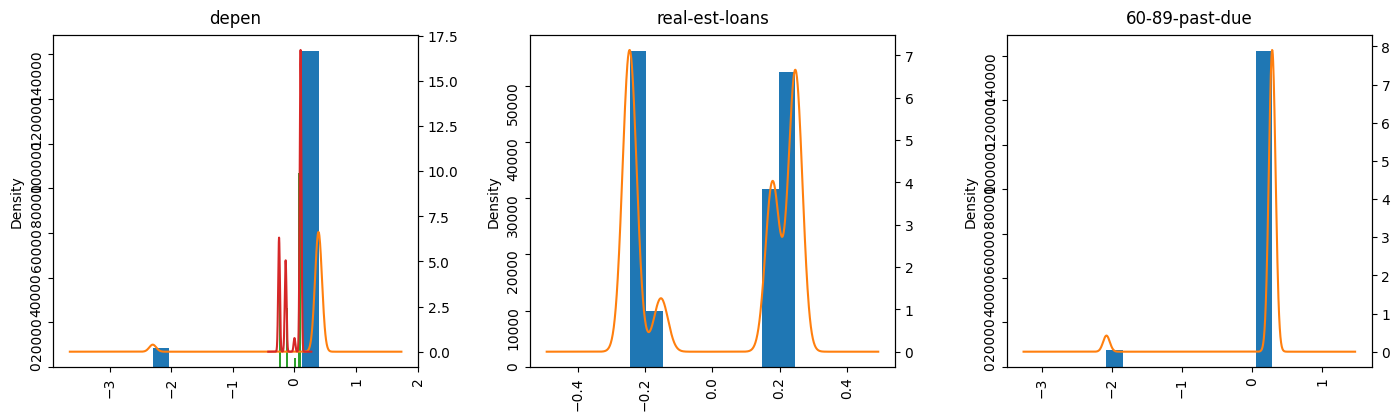

In [16]:
plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=gmsc_prep_ds_path)

#### Plot samples count before and after Data cleaning.

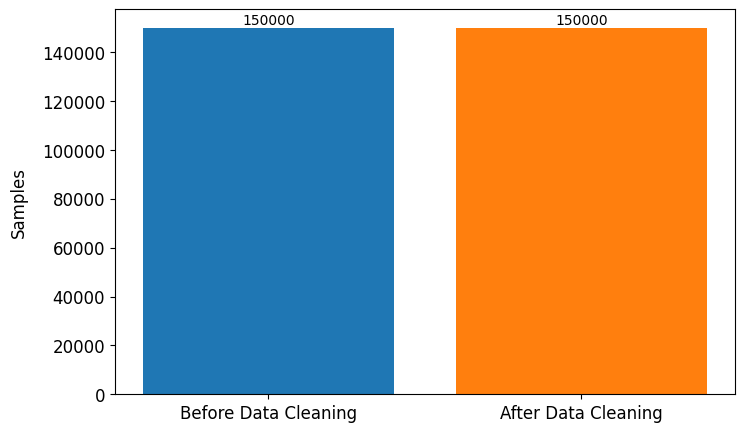

In [17]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=gmsc_prep_ds_path + 'before_after.pdf')

#### Features IV scores

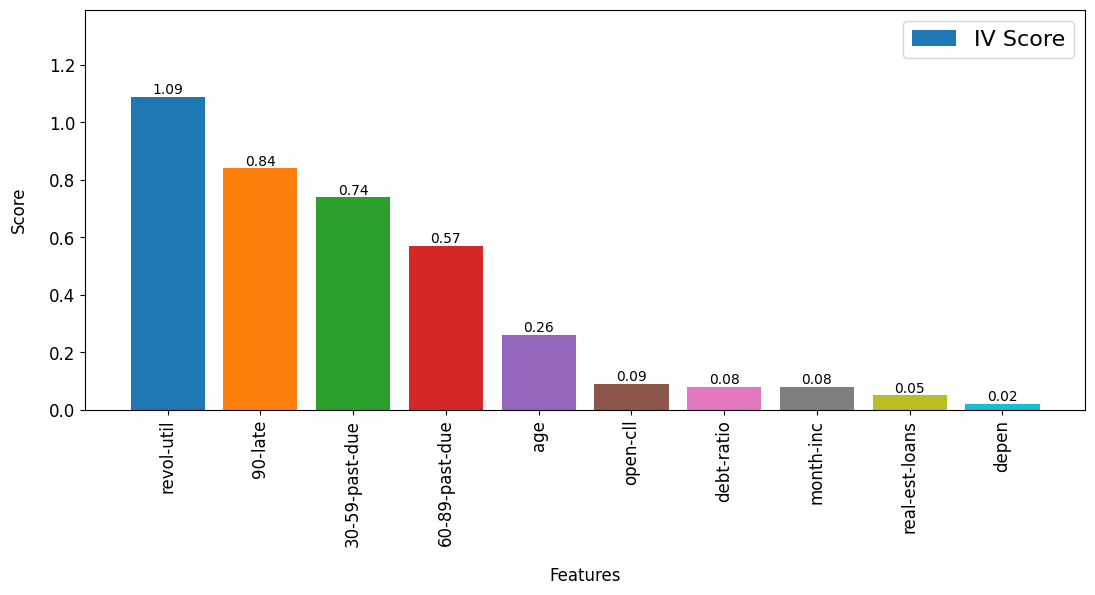

In [18]:
plotting.plot_features_scores(features_scores, '')

#### Features correlation

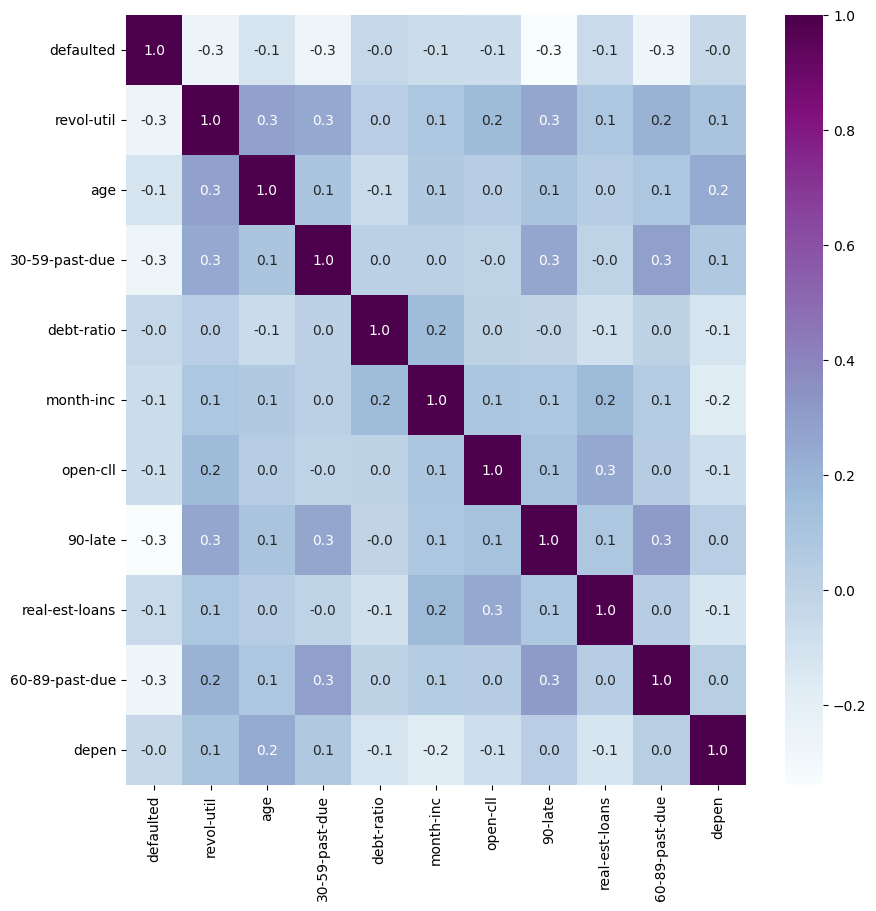

In [19]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(10, 10), save_path=gmsc_prep_ds_path, dpi=100)

#### No redundant features to be dropped.

#### Save preprocessed dataset.

In [20]:
data

,defaulted,revol-util,age,30-59-past-due,debt-ratio,month-inc,open-cll,90-late,real-est-loans,60-89-past-due,depen
0,True,-0.909378,-0.210684,-1.901126,-0.646772,0.291338,0.126950,0.389739,-0.152424,0.288215,-0.250098
1,False,-1.396911,-0.326789,0.541721,0.136371,-0.431678,0.044997,0.389739,-0.245572,0.288215,-0.143369
2,False,-0.400244,-0.326789,-0.903654,0.136371,-0.431678,-0.729262,-2.299145,-0.245572,0.288215,0.099037
3,False,0.551316,-0.502833,0.541721,0.136371,-0.431678,0.056167,0.389739,-0.245572,0.288215,0.099037
4,False,-1.396911,-0.171597,-0.903654,0.136371,0.511699,0.189262,0.389739,0.247038,0.288215,0.099037
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,1.375509,1.040118,0.541721,0.183576,-0.384741,0.044997,0.389739,0.247038,0.288215,0.099037
149996,False,0.551316,-0.210684,0.541721,-0.388170,0.009908,0.044997,0.389739,0.247038,0.288215,-0.250098
149997,False,0.551316,0.253180,0.541721,-0.646772,0.000000,-0.047096,0.389739,0.247038,0.288215,0.099037
149998,False,1.375509,-0.502833,0.541721,0.136371,0.009908,0.044997,0.389739,-0.245572,0.288215,0.099037


In [21]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   defaulted       150000 non-null  bool   
 1   revol-util      150000 non-null  float64
 2   age             150000 non-null  float64
 3   30-59-past-due  150000 non-null  float64
 4   debt-ratio      150000 non-null  float64
 5   month-inc       150000 non-null  float64
 6   open-cll        150000 non-null  float64
 7   90-late         150000 non-null  float64
 8   real-est-loans  150000 non-null  float64
 9   60-89-past-due  150000 non-null  float64
 10  depen           150000 non-null  float64
dtypes: bool(1), float64(10)
memory usage: 11.6 MB


**EMP-$p_1$:**

In [22]:
preprocessing.compute_p1(data)

0.06684

**EMP-$p_0$:**

In [23]:
preprocessing.compute_p0(data)

0.93316

In [24]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=gmsc_prep_ds_path)

Train split size: 120000
Train split p1: 0.06684166666666666
Train split p0: 0.9331583333333333

Test split size: 30000
Test split p1: 0.06683333333333333
Test split p0: 0.9331666666666667
